# Moho Models
**Description:**  Moho topography from various sources. 

**Dataset DOI:** N.A.

**Associated papers:**

The Crust and Upper Mantle Structure of Central and West Antarctica from Bayesian Inversion of Rayleigh Wave and Receiver Functions. DOI: 10.1029/2017JB015346

S-Velocity Model and Inferred Moho Topography beneath the Antarctic Plate from Rayleigh Waves. DOI: 10.1002/2014JB011332

In [7]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, regions, utils

In [4]:
version_names = [
    "shen-2018",
    "an-2015",
]

grids = []
for name in version_names:
    data = fetch.moho(
        version=name,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for shen-2018
grid spacing: 10000.0 m
grid region: (-2800000.0, 2800000.0, -2800000.0, 2800000.0)
grid zmin: -57223.5273438
grid zmax: -17218.0996094
grid registration: g
##########
Info for an-2015
grid spacing: 5000.0 m
grid region: (-3330000.0, 3330000.0, -3330000.0, 3330000.0)
grid zmin: -65197.1328125
grid zmax: -6264.58496094
grid registration: g
##########


/home/mdtanker/polartoolkit/src/polartoolkit/maps.py:578: UserWarning: getting max/min values from grid, if cpt_lims were used to create the colorscale, histogram will not properly align with colorbar!
  add_colorbar(


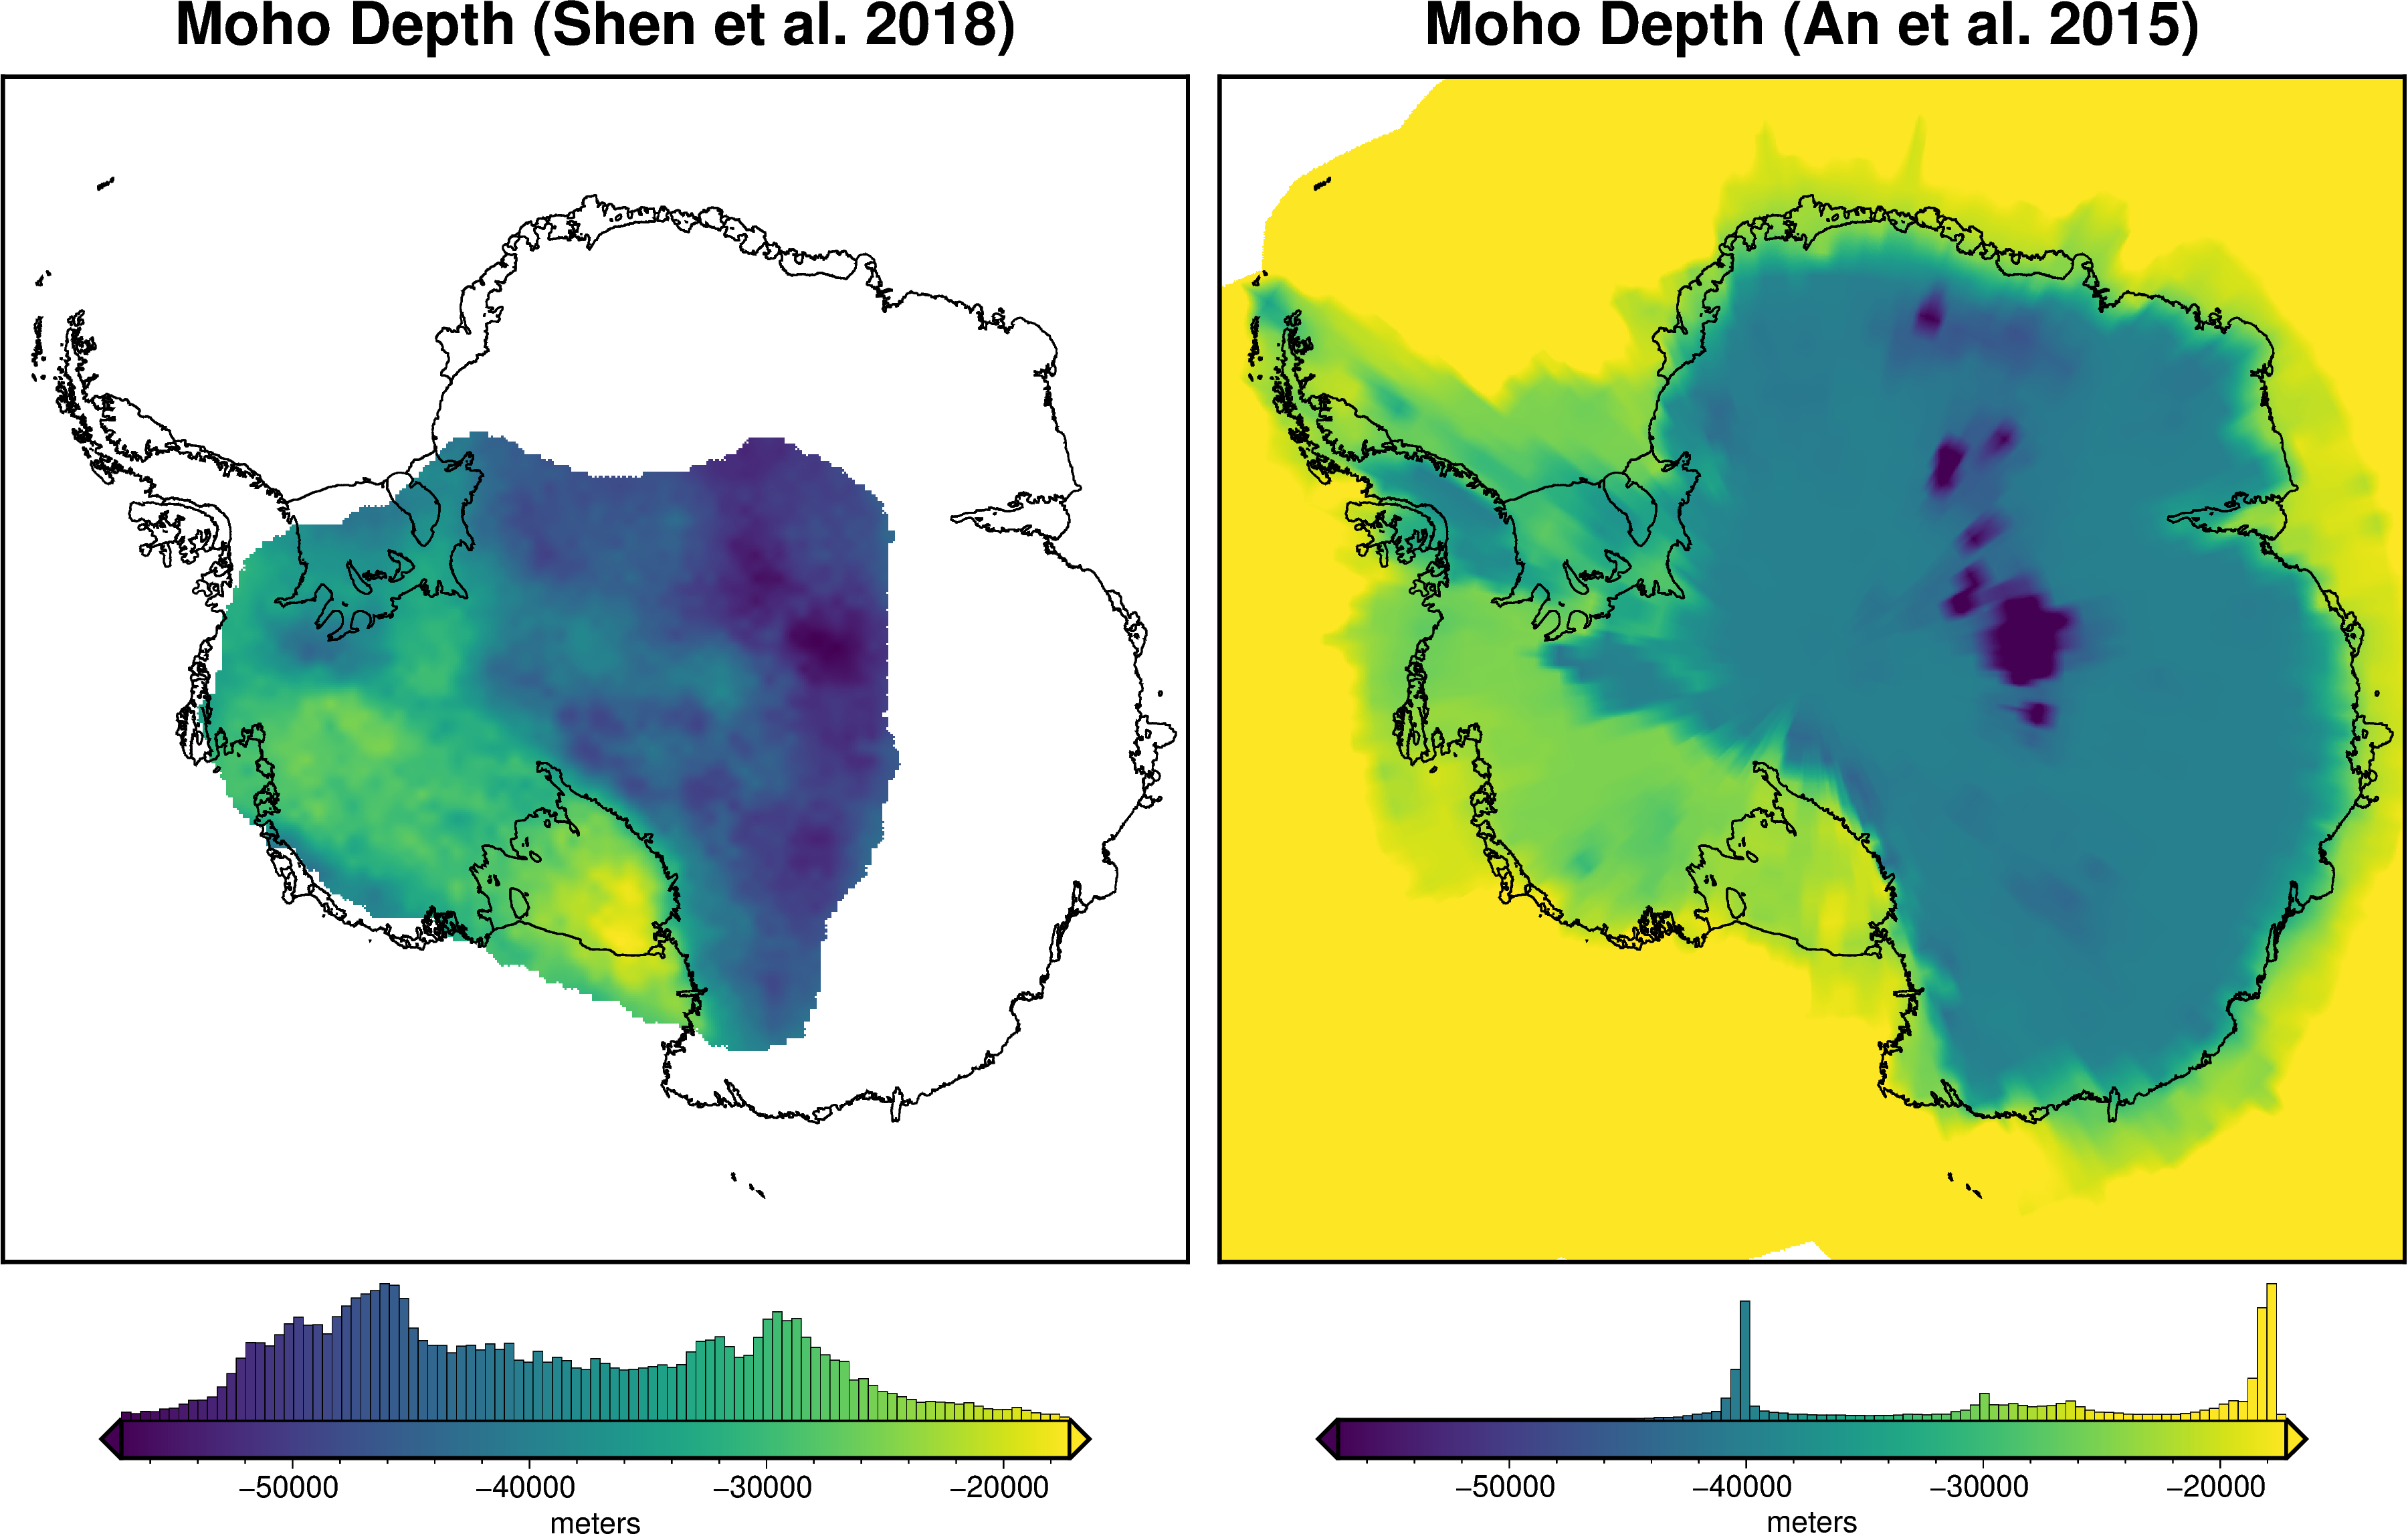

In [10]:
fig = maps.plot_grd(
    grids[0],
    title="Moho Depth (Shen et al. 2018)",
    region=regions.antarctica,
    cbar_label="meters",
    coast=True,
    hist=True,
)
fig = maps.plot_grd(
    grids[1],
    fig=fig,
    origin_shift="xshift",
    title="Moho Depth (An et al. 2015)",
    region=regions.antarctica,
    cmap=True,
    cbar_label="meters",
    coast=True,
    hist=True,
)
fig.show()